<a href="https://colab.research.google.com/github/GavenDcosta/ML_codes/blob/main/disbetes_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')



In [2]:
# Step 2: Load the dataset
file_path = '/content/diabetes.csv'  # Use the correct path if the file is already in Colab
df = pd.read_csv(file_path)

# Step 3: Check for missing values
print("\nMissing values in the dataset:\n", df.isnull().sum())




Missing values in the dataset:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

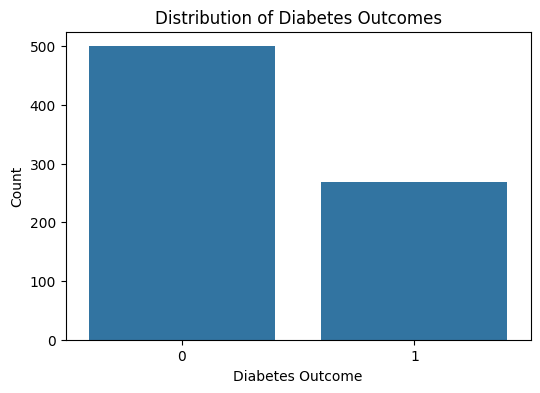

In [11]:
# Step 4: Perform EDA

print(df.head())  # Display the first few rows
print(df.describe())  # Summary statistics
print(df.info())  # Info about data types and missing values

# Distribution of the target variable 'Outcome'
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcomes')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Count')
plt.show()


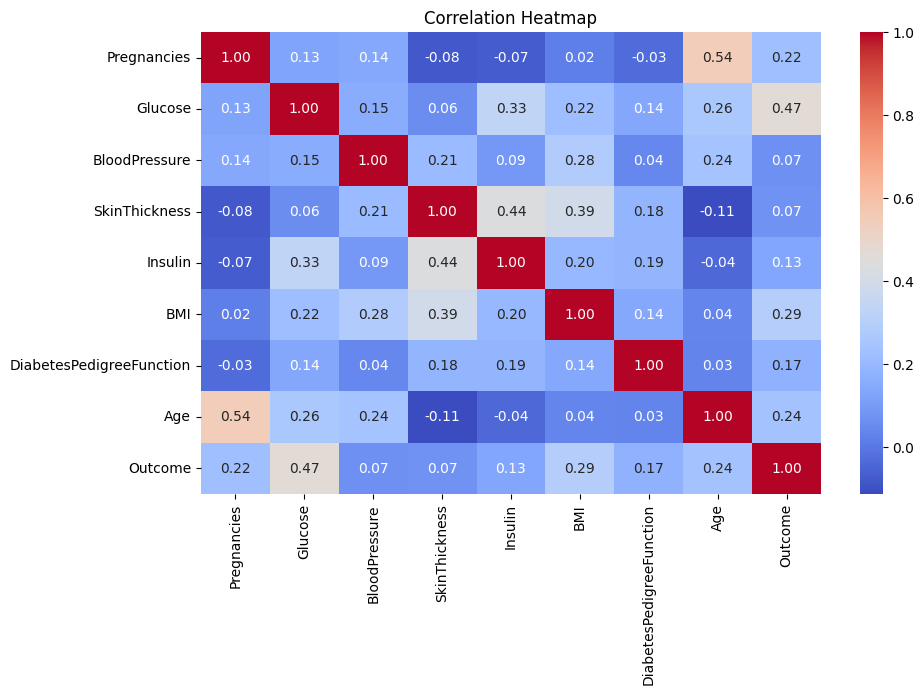

In [12]:
# Heatmap to check correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [15]:
# Step 5: Define features (X) and target (y)
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Step 6: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)



Training set size: (614, 8)
Testing set size: (154, 8)


In [17]:
# Step 8: Create Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Step 9: Make predictions with Decision Tree
y_pred_tree = decision_tree_model.predict(X_test)

# Step 10: Evaluate Decision Tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("\nAccuracy of Decision Tree model:", accuracy_tree)

# Confusion Matrix for Decision Tree
cm_tree = confusion_matrix(y_test, y_pred_tree)
print("\nConfusion Matrix for Decision Tree:\n", cm_tree)



Accuracy of Decision Tree model: 0.7467532467532467

Confusion Matrix for Decision Tree:
 [[75 24]
 [15 40]]


In [18]:
# Step 11: Create Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

# Step 12: Make predictions with Random Forest
y_pred_forest = random_forest_model.predict(X_test_scaled)

# Step 13: Evaluate Random Forest model
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print("\nAccuracy of Random Forest model:", accuracy_forest)

# Confusion Matrix for Random Forest
cm_forest = confusion_matrix(y_test, y_pred_forest)
print("\nConfusion Matrix for Random Forest:\n", cm_forest)




Accuracy of Random Forest model: 0.7207792207792207

Confusion Matrix for Random Forest:
 [[77 22]
 [21 34]]


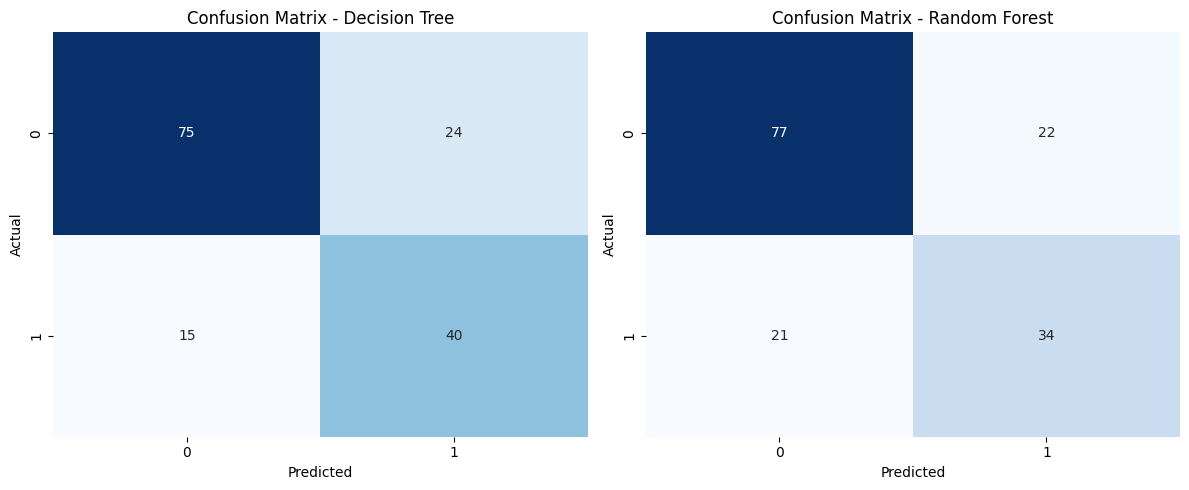

In [19]:
# Step 14: Visualize Confusion Matrices
plt.figure(figsize=(12, 5))

# Decision Tree Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Random Forest Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(cm_forest, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()



In [20]:
# Step 15: Show Classification Reports
print("\nClassification Report for Decision Tree:\n", classification_report(y_test, y_pred_tree))
print("\nClassification Report for Random Forest:\n", classification_report(y_test, y_pred_forest))


Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

